In [33]:
import numpy
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr
import tigramite.data_processing as pp
import tigramite.plotting as pl

### Demo

In [4]:
numpy.random.seed(42)

In [5]:
links_coeffs = {0: [((0, -1), 0.8)],
                    1: [((1, -1), 0.8), ((0, -1), 0.5)],
                    2: [((2, -1), 0.8), ((1, -2), -0.6)]}

In [6]:
data, _ = pp.var_process(links_coeffs, T=1000)

In [8]:
dataframe = pp.DataFrame(data)
cond_ind_test = ParCorr()
pcmci = PCMCI(dataframe=dataframe, cond_ind_test=cond_ind_test)
results = pcmci.run_pcmci(tau_max=2, pc_alpha=None)

In [12]:
pcmci._print_significant_links(p_matrix=results['p_matrix'],
                                     val_matrix=results['val_matrix'],
                                     alpha_level=0.05)


## Significant links at alpha = 0.05:

    Variable 0 has 1 link(s):
        (0 -1): pval = 0.00000 | val = 0.624

    Variable 1 has 2 link(s):
        (1 -1): pval = 0.00000 | val = 0.601
        (0 -1): pval = 0.00000 | val = 0.487

    Variable 2 has 2 link(s):
        (2 -1): pval = 0.00000 | val = 0.597
        (1 -2): pval = 0.00000 | val = -0.511


In [18]:
pcmci._return_significant_parents(pq_matrix=results['p_matrix'],
                                     val_matrix=results['val_matrix'],
                                     alpha_level=0.05)

{'parents': {0: [(0, -1)], 1: [(1, -1), (0, -1)], 2: [(2, -1), (1, -2)]},
 'link_matrix': array([[[False,  True, False],
         [False,  True, False],
         [False, False, False]],
 
        [[False, False, False],
         [False,  True, False],
         [False, False,  True]],
 
        [[False, False, False],
         [False, False, False],
         [False,  True, False]]])}

### Run with my data

In [30]:
import pandas as pd

df = pd.read_csv("c_vol__btc_price_timeseries.csv")
arr = df.values

tig_df = pp.DataFrame(arr)

pcmci = PCMCI(dataframe=tig_df, cond_ind_test=cond_ind_test)
results = pcmci.run_pcmci(tau_max=2, pc_alpha=None)

/home/pbashiri/anaconda3/lib/python3.7/site-packages/tigramite/independence_tests.py:1144: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta_hat = numpy.linalg.lstsq(z, y)[0]


In [35]:
results

{'val_matrix': array([[[ 0.        ,  0.55064542,  0.09614107],
         [ 0.        ,  0.08930613, -0.15709255]],
 
        [[ 0.        ,  0.02483792,  0.0422932 ],
         [ 0.        ,  0.73572467, -0.05315678]]]),
 'p_matrix': array([[[1.00000000e+00, 3.87254695e-44, 2.56124768e-02],
         [1.00000000e+00, 3.83810952e-02, 2.57604773e-04]],
 
        [[1.00000000e+00, 5.65749307e-01, 3.28415857e-01],
         [1.00000000e+00, 1.35342269e-92, 2.19630205e-01]]]),
 'q_matrix': None,
 'conf_matrix': None}

In [31]:
pcmci._print_significant_links(p_matrix=results['p_matrix'],
                                     val_matrix=results['val_matrix'],
                                     alpha_level=0.05)


## Significant links at alpha = 0.05:

    Variable 0 has 2 link(s):
        (0 -1): pval = 0.00000 | val = 0.551
        (0 -2): pval = 0.02561 | val = 0.096

    Variable 1 has 3 link(s):
        (1 -1): pval = 0.00000 | val = 0.736
        (0 -2): pval = 0.00026 | val = -0.157
        (0 -1): pval = 0.03838 | val = 0.089


In [48]:
dic = pcmci._return_significant_parents(pq_matrix=results['p_matrix'],
                                     val_matrix=results['val_matrix'],
                                     alpha_level=0.05)

In [50]:
dic

{'parents': {0: [(0, -1), (0, -2)], 1: [(1, -1), (0, -2), (0, -1)]},
 'link_matrix': array([[[False,  True,  True],
         [False,  True,  True]],
 
        [[False, False, False],
         [False,  True, False]]])}

In [51]:
type(dic['link_matrix'])

numpy.ndarray

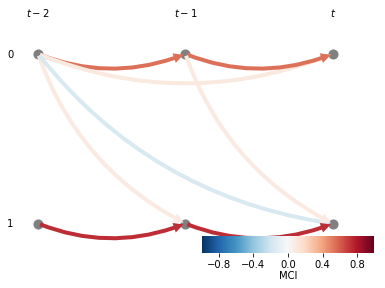

In [52]:
pl.plot_time_series_graph(results['val_matrix'], link_matrix=dic['link_matrix'])